In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset


In [2]:
df = pd.read_csv('data_sets/patient_dataset.csv')

## Details and Summary on the Dataset


In [3]:
df.head()

,Patient_number,Cholesterol,Glucose,HDL_Chol,Age,Gender,Height,Weight,Systolic_BP,Diastolic_BP,Waist,Hip,Diabetes
0,1,193,77,49,19,female,61,119,118,70,32,38,No diabetes
1,2,146,79,41,19,female,60,135,108,58,33,40,No diabetes
2,3,217,75,54,20,female,67,187,110,72,40,45,No diabetes
3,4,226,97,70,20,female,64,114,122,64,31,39,No diabetes
4,5,164,91,67,20,female,70,141,122,86,32,39,No diabetes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_number  390 non-null    int64 
 1   Cholesterol     390 non-null    int64 
 2   Glucose         390 non-null    int64 
 3   HDL_Chol        390 non-null    int64 
 4   Age             390 non-null    int64 
 5   Gender          390 non-null    object
 6   Height          390 non-null    int64 
 7   Weight          390 non-null    int64 
 8   Systolic_BP     390 non-null    int64 
 9   Diastolic_BP    390 non-null    int64 
 10  Waist           390 non-null    int64 
 11  Hip             390 non-null    int64 
 12  Diabetes        390 non-null    object
dtypes: int64(11), object(2)
memory usage: 39.7+ KB


In [5]:
df.describe()

,Patient_number,Cholesterol,Glucose,HDL_Chol,Age,Height,Weight,Systolic_BP,Diastolic_BP,Waist,Hip
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,46.774359,65.951282,177.407692,137.133333,83.289744,37.869231,42.992308
std,112.727548,44.666005,53.798188,17.279069,16.435911,3.918867,40.407824,22.859528,13.498192,5.760947,5.664342
min,1.000000,78.000000,48.000000,12.000000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,98.250000,179.000000,81.000000,38.000000,34.000000,63.000000,150.250000,122.000000,75.000000,33.000000,39.000000
50%,195.500000,203.000000,90.000000,46.000000,44.500000,66.000000,173.000000,136.000000,82.000000,37.000000,42.000000
75%,292.750000,229.000000,107.750000,59.000000,60.000000,69.000000,200.000000,148.000000,90.000000,41.000000,46.000000
max,390.000000,443.000000,385.000000,120.000000,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


## Vision on the columns of data

In [6]:
list(df.columns)

['Patient_number',
 'Cholesterol',
 'Glucose',
 'HDL_Chol',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'Systolic_BP',
 'Diastolic_BP',
 'Waist',
 'Hip',
 'Diabetes']

In [7]:
df.isnull().sum()

Patient_number    0
Cholesterol       0
Glucose           0
HDL_Chol          0
Age               0
Gender            0
Height            0
Weight            0
Systolic_BP       0
Diastolic_BP      0
Waist             0
Hip               0
Diabetes          0
dtype: int64

## Seperation of data into Numerical and Categorical Values

In [8]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
numerical_columns = df.select_dtypes(exclude=['category', 'object']).columns.drop(['Patient_number'])

## Checking for Missing Values Under Categorical and Numerical Values

In [9]:
df[categorical_columns].isnull().sum()

Gender      0
Diabetes    0
dtype: int64

In [10]:
df[numerical_columns].isnull().sum()

Cholesterol     0
Glucose         0
HDL_Chol        0
Age             0
Height          0
Weight          0
Systolic_BP     0
Diastolic_BP    0
Waist           0
Hip             0
dtype: int64

# Graphical Representation of the Stats

### Outliers Among the Numerical Data

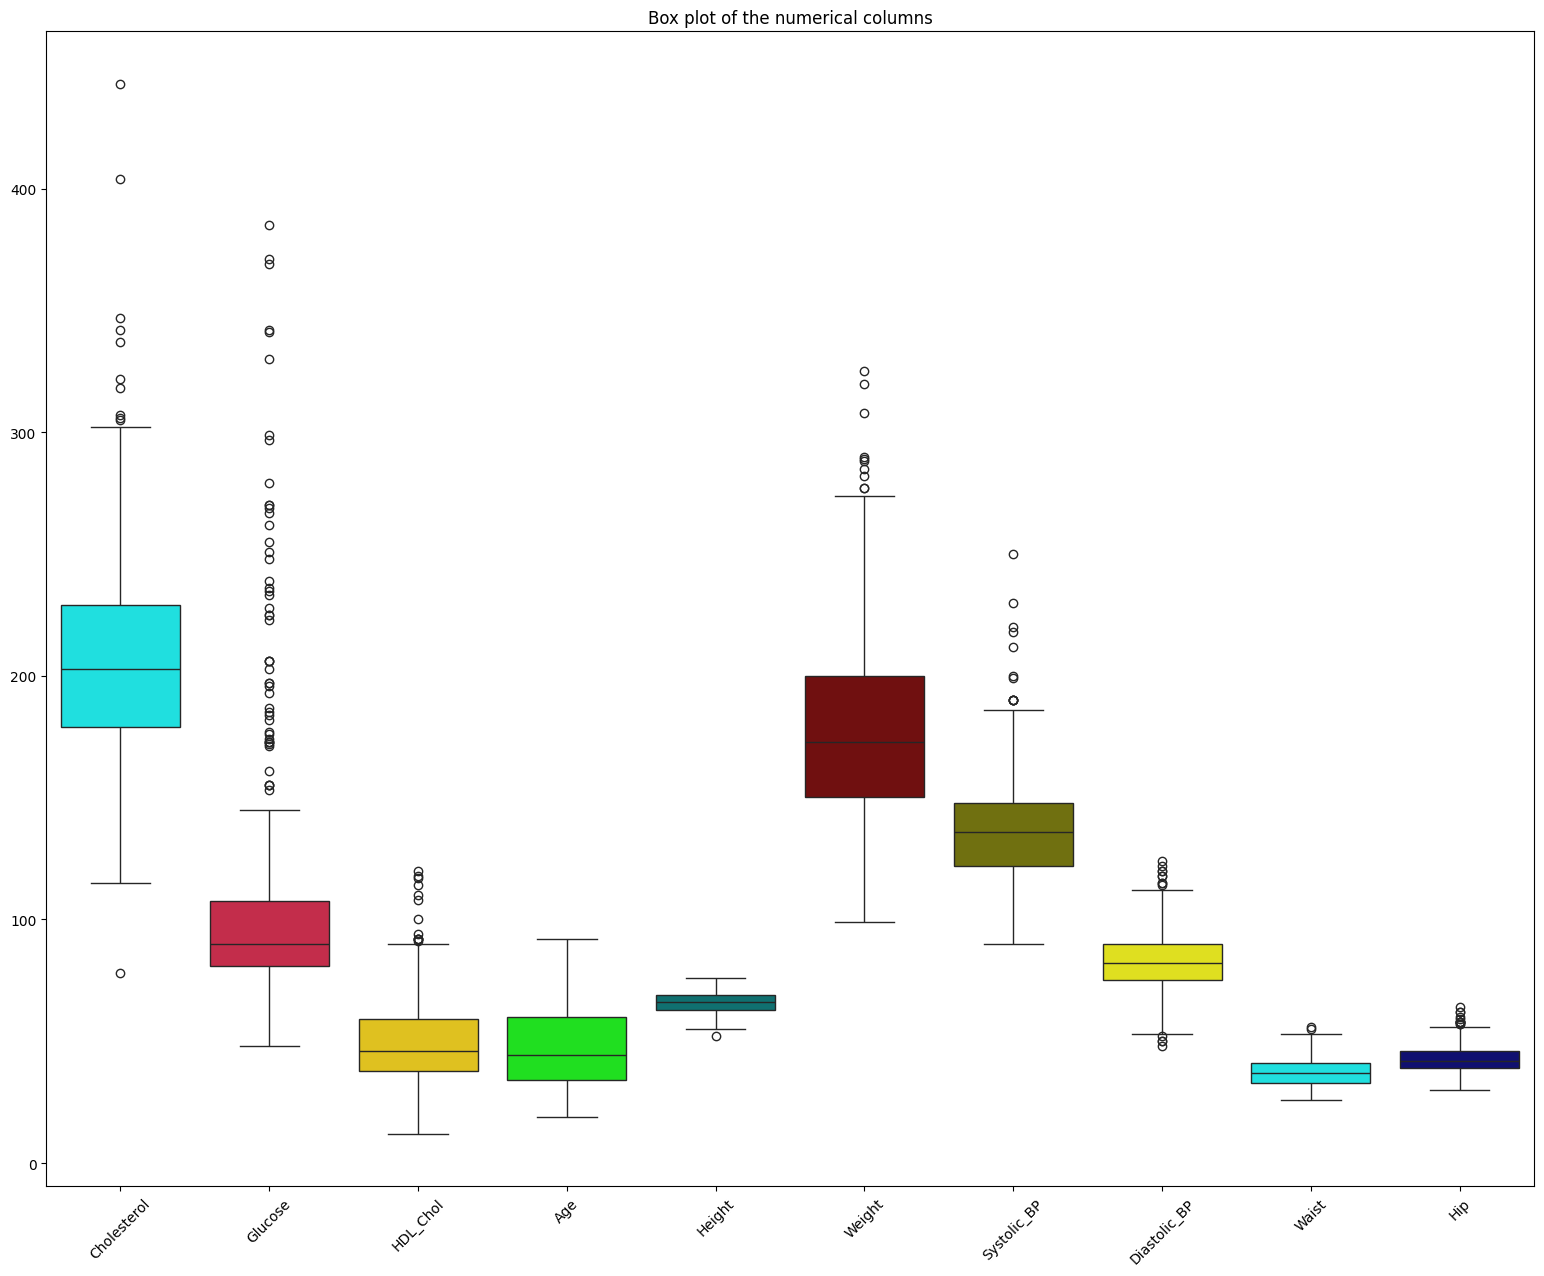

In [11]:
# Define custom colors for the boxplot
custom_colors = ['cyan', 'crimson', 'gold', 'lime', 'teal', 'maroon', 'olive', 'yellow', 'aqua', 'navy']

# Plotting boxplot with custom colors
plt.figure(figsize=(19.2, 15))
sns.boxplot(data=df[numerical_columns], palette=custom_colors)
plt.xticks(rotation=45)
plt.title('Box plot of the numerical columns')
plt.show()

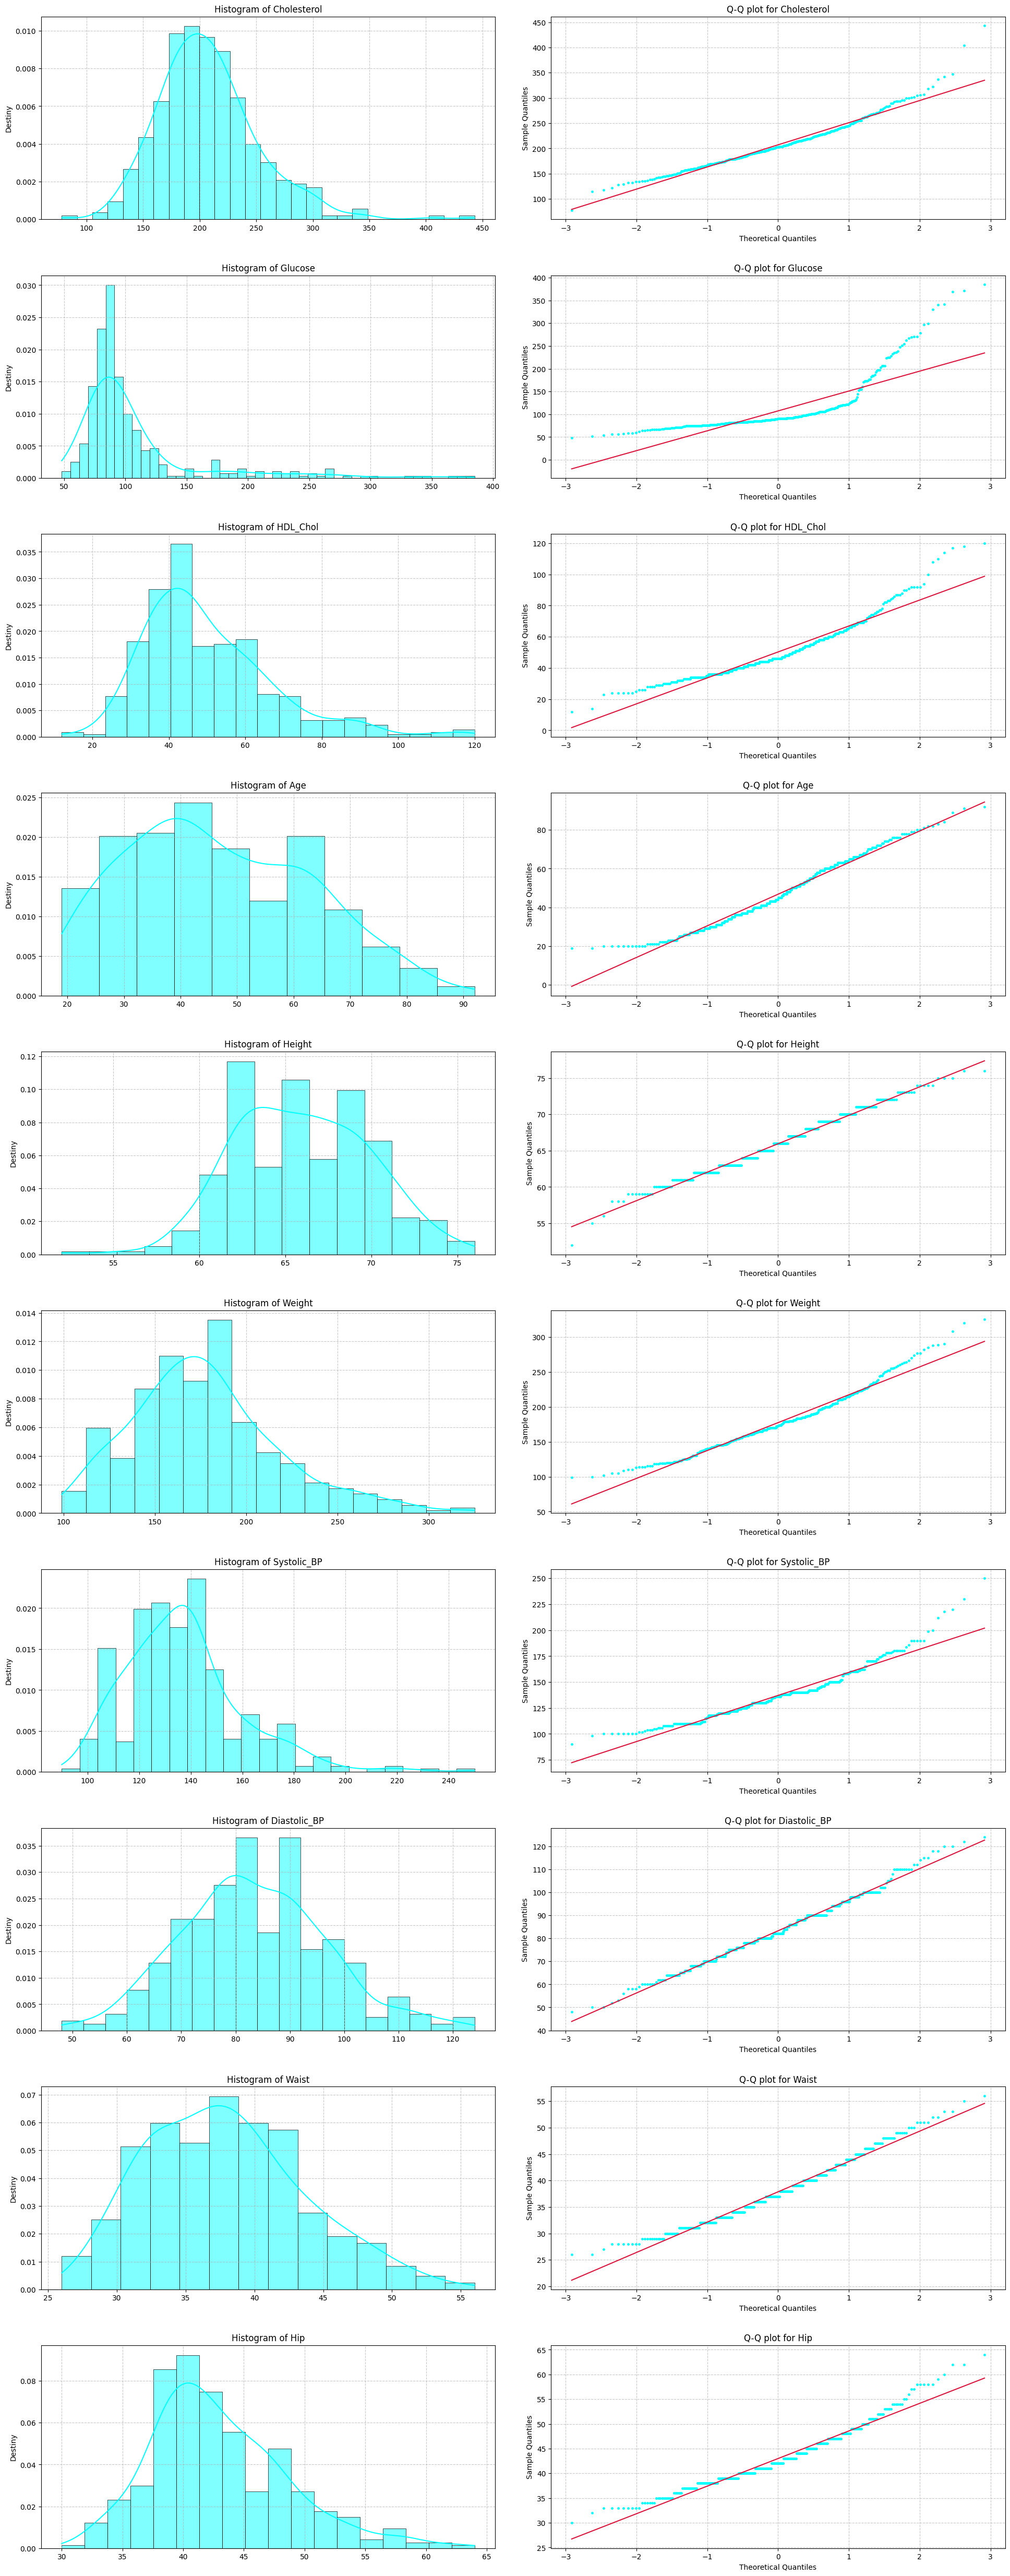

In [12]:
import scipy.stats as stats
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(20, num_cols * 5))

#plotting histogram and Q-Q plots for each numerical column
for i, col in enumerate (numerical_columns):
     #hsitogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i,0], stat='density', linewidth=0.5, color='cyan')
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('Destiny')
    axes[i,0].grid(True, linestyle='--',alpha=0.7)

    #Q-Q plot on the right subplot
    stats.probplot(df[col],plot=axes[i,1],dist='norm',fit=True)
    axes[i, 1].get_lines()[0].set_color('cyan')  # Color for the points
    axes[i, 1].get_lines()[1].set_color('crimson')  # Color for the line
    axes[i,1].get_lines()[0].set_markersize(2.5)
    axes[i,1].grid(True, linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q plot for {col}')
    axes[i,1].set_xlabel('Theoretical Quantiles')
    axes[i,1].set_ylabel('Sample Quantiles')

#Adjust layout on the righr subplot
plt.tight_layout(pad=3.0)
plt.show()

### Performing Normality Tests using:
* Shapiro-Wilk
* Anderson-Darling test
* Jarque-Bera test
* D'Agostino and Pearson's test
* Kolmogorov-Smirnov test
* Lilliefors test

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro, normaltest, kstest
from statsmodels.stats.diagnostic import lilliefors # Corrected import

# Function to perform normality tests
def test_normality (df, col):
    print(f'\033[1mColumn: \033[36m{col}\033[0;0m')
    
    
#Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro (df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed \033[91m(fail to reject h0)\033[0;0m')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed \033[91m(reject h0)\033[0;0m')
        
# Anderson-Darling test
    result_anderson = anderson (df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values [2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed \033[91m(fail to reject h0)\033[0;0m')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed \033[91m(reject h0)\033[0;0m')
        
# Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value= {p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed \033[91m(fail to reject h0)\033[0;0m')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed \033[91m(reject h0)\033[0;0m')

# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df [col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value= {p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed \033[91m(fail to reject h0)\033[0;0m")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed \033[91m(reject h0)\033[0;0m")
    
# Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest (df [col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value= {p_ks: .3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed \033[91m(fail to reject h0)\033[0;0m')
    else:
        print(f"Kolmogorov-Smirnov Test: {col} does not look normally distributed \033[91m(reject h0)\033[0;0m")

# Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors (df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors: .3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed \033[91m(fail to reject h0)\033[0;0m')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed \033[91m(reject h0)\033[0;0m')
    print('\n')
    
# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality (df, col)

Column: Cholesterol
Shapiro-Wilk Test: Statistics=0.957, p-value=0.000
Shapiro-Wilk Test: Cholesterol does not look normally distributed (reject h0)
Anderson-Darling Test: Statistics=2.946
Anderson-Darling Test: Critical Values: [0.57  0.649 0.779 0.909 1.081]
Anderson-Darling Test: Cholesterol does not look normally distributed (reject h0)
Jarque-Bera Test: JB statistic=172.082, p-value= 0.000
Jarque-Bera Test: Cholesterol does not look normally distributed (reject h0)
D'Agostino and Pearson's Test: Statistics=74.137, p-value= 0.000
D'Agostino and Pearson's Test: Cholesterol does not look normally distributed (reject h0)
Kolmogorov-Smirnov Test: KS statistic=1.000, p-value=  0.000
Kolmogorov-Smirnov Test: Cholesterol does not look normally distributed (reject h0)
Lilliefors Test: Statistics= 0.073, p-value=0.001
Lilliefors Test: Cholesterol does not look normally distributed (reject h0)


Column: Glucose
Shapiro-Wilk Test: Statistics=0.654, p-value=0.000
Shapiro-Wilk Test: Glucose doe

## Function to Detect Outliers using IQR Method and Return Column-wise Boolean Indicators

In [14]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")


Outliers detected using IQR method:
Patient_number: True
Cholesterol: True
Glucose: True
HDL_Chol: True
Age: False
Gender: True
Height: True
Weight: True
Systolic_BP: True
Diastolic_BP: True
Waist: True
Hip: True
Diabetes: True


## Removing Outliers Using IQR method?
In bioinformatics and data science, the Z-score method can be useful when data closely follow a normal distribution. However, biological data often deviates from normality, and the IQR method offers more robustness in such cases.

But since we have outliers that are genuine data points and not errors, removing them might distort the representation of the data. 


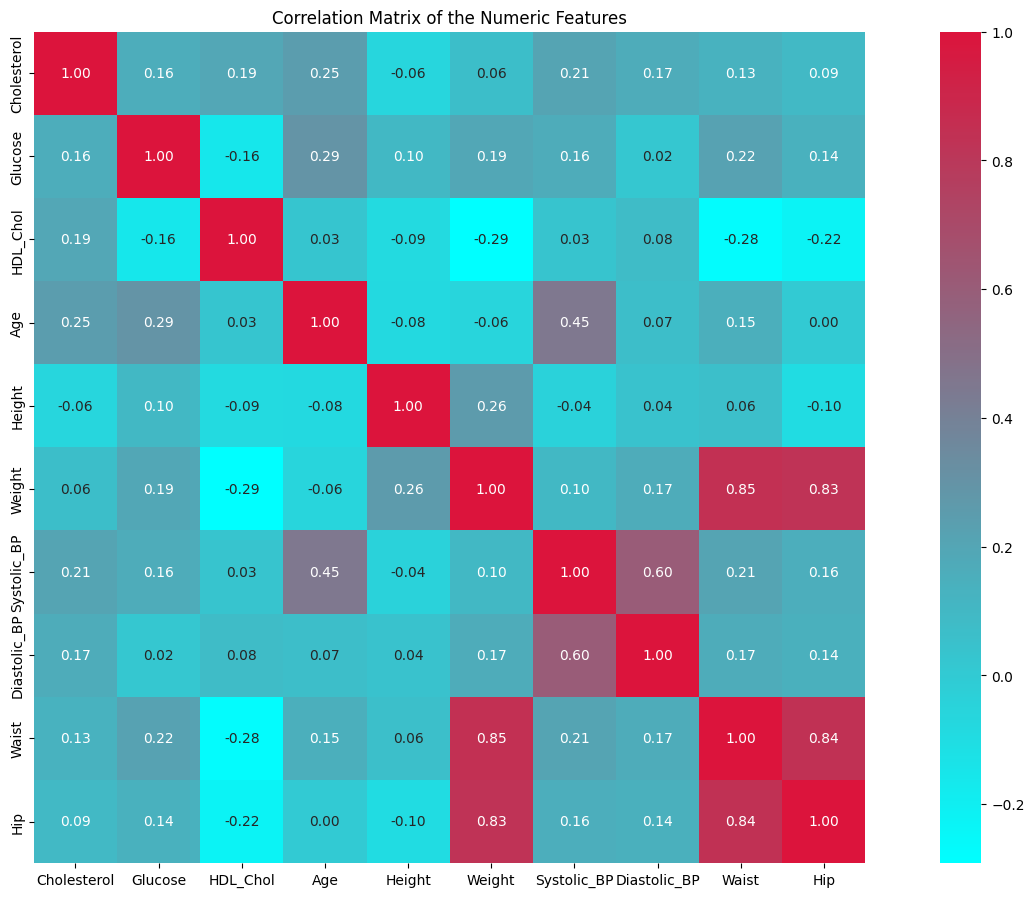

In [15]:
from matplotlib.colors import LinearSegmentedColormap

# Assuming numerical_columns is defined and contains the list of numerical column names
numeric_data = df[numerical_columns]

# Compute pairwise correlation of the numeric columns
correlation_matrix = numeric_data.corr()

# Define colors for custom colormap (cyan to crimson)
colors = [(0, 1, 1), (0.8627, 0.0784, 0.2353)]  # Cyan (0, 1, 1) to Crimson (0.8627, 0.0784, 0.2353) in RGB format (My Fav. Color Combo IG)

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("Custom_Cyan_to_Crimson", colors, N=256)

# Plotting correlation heatmap with custom colormap
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", square=True)
plt.title('Correlation Matrix of the Numeric Features')
plt.show()


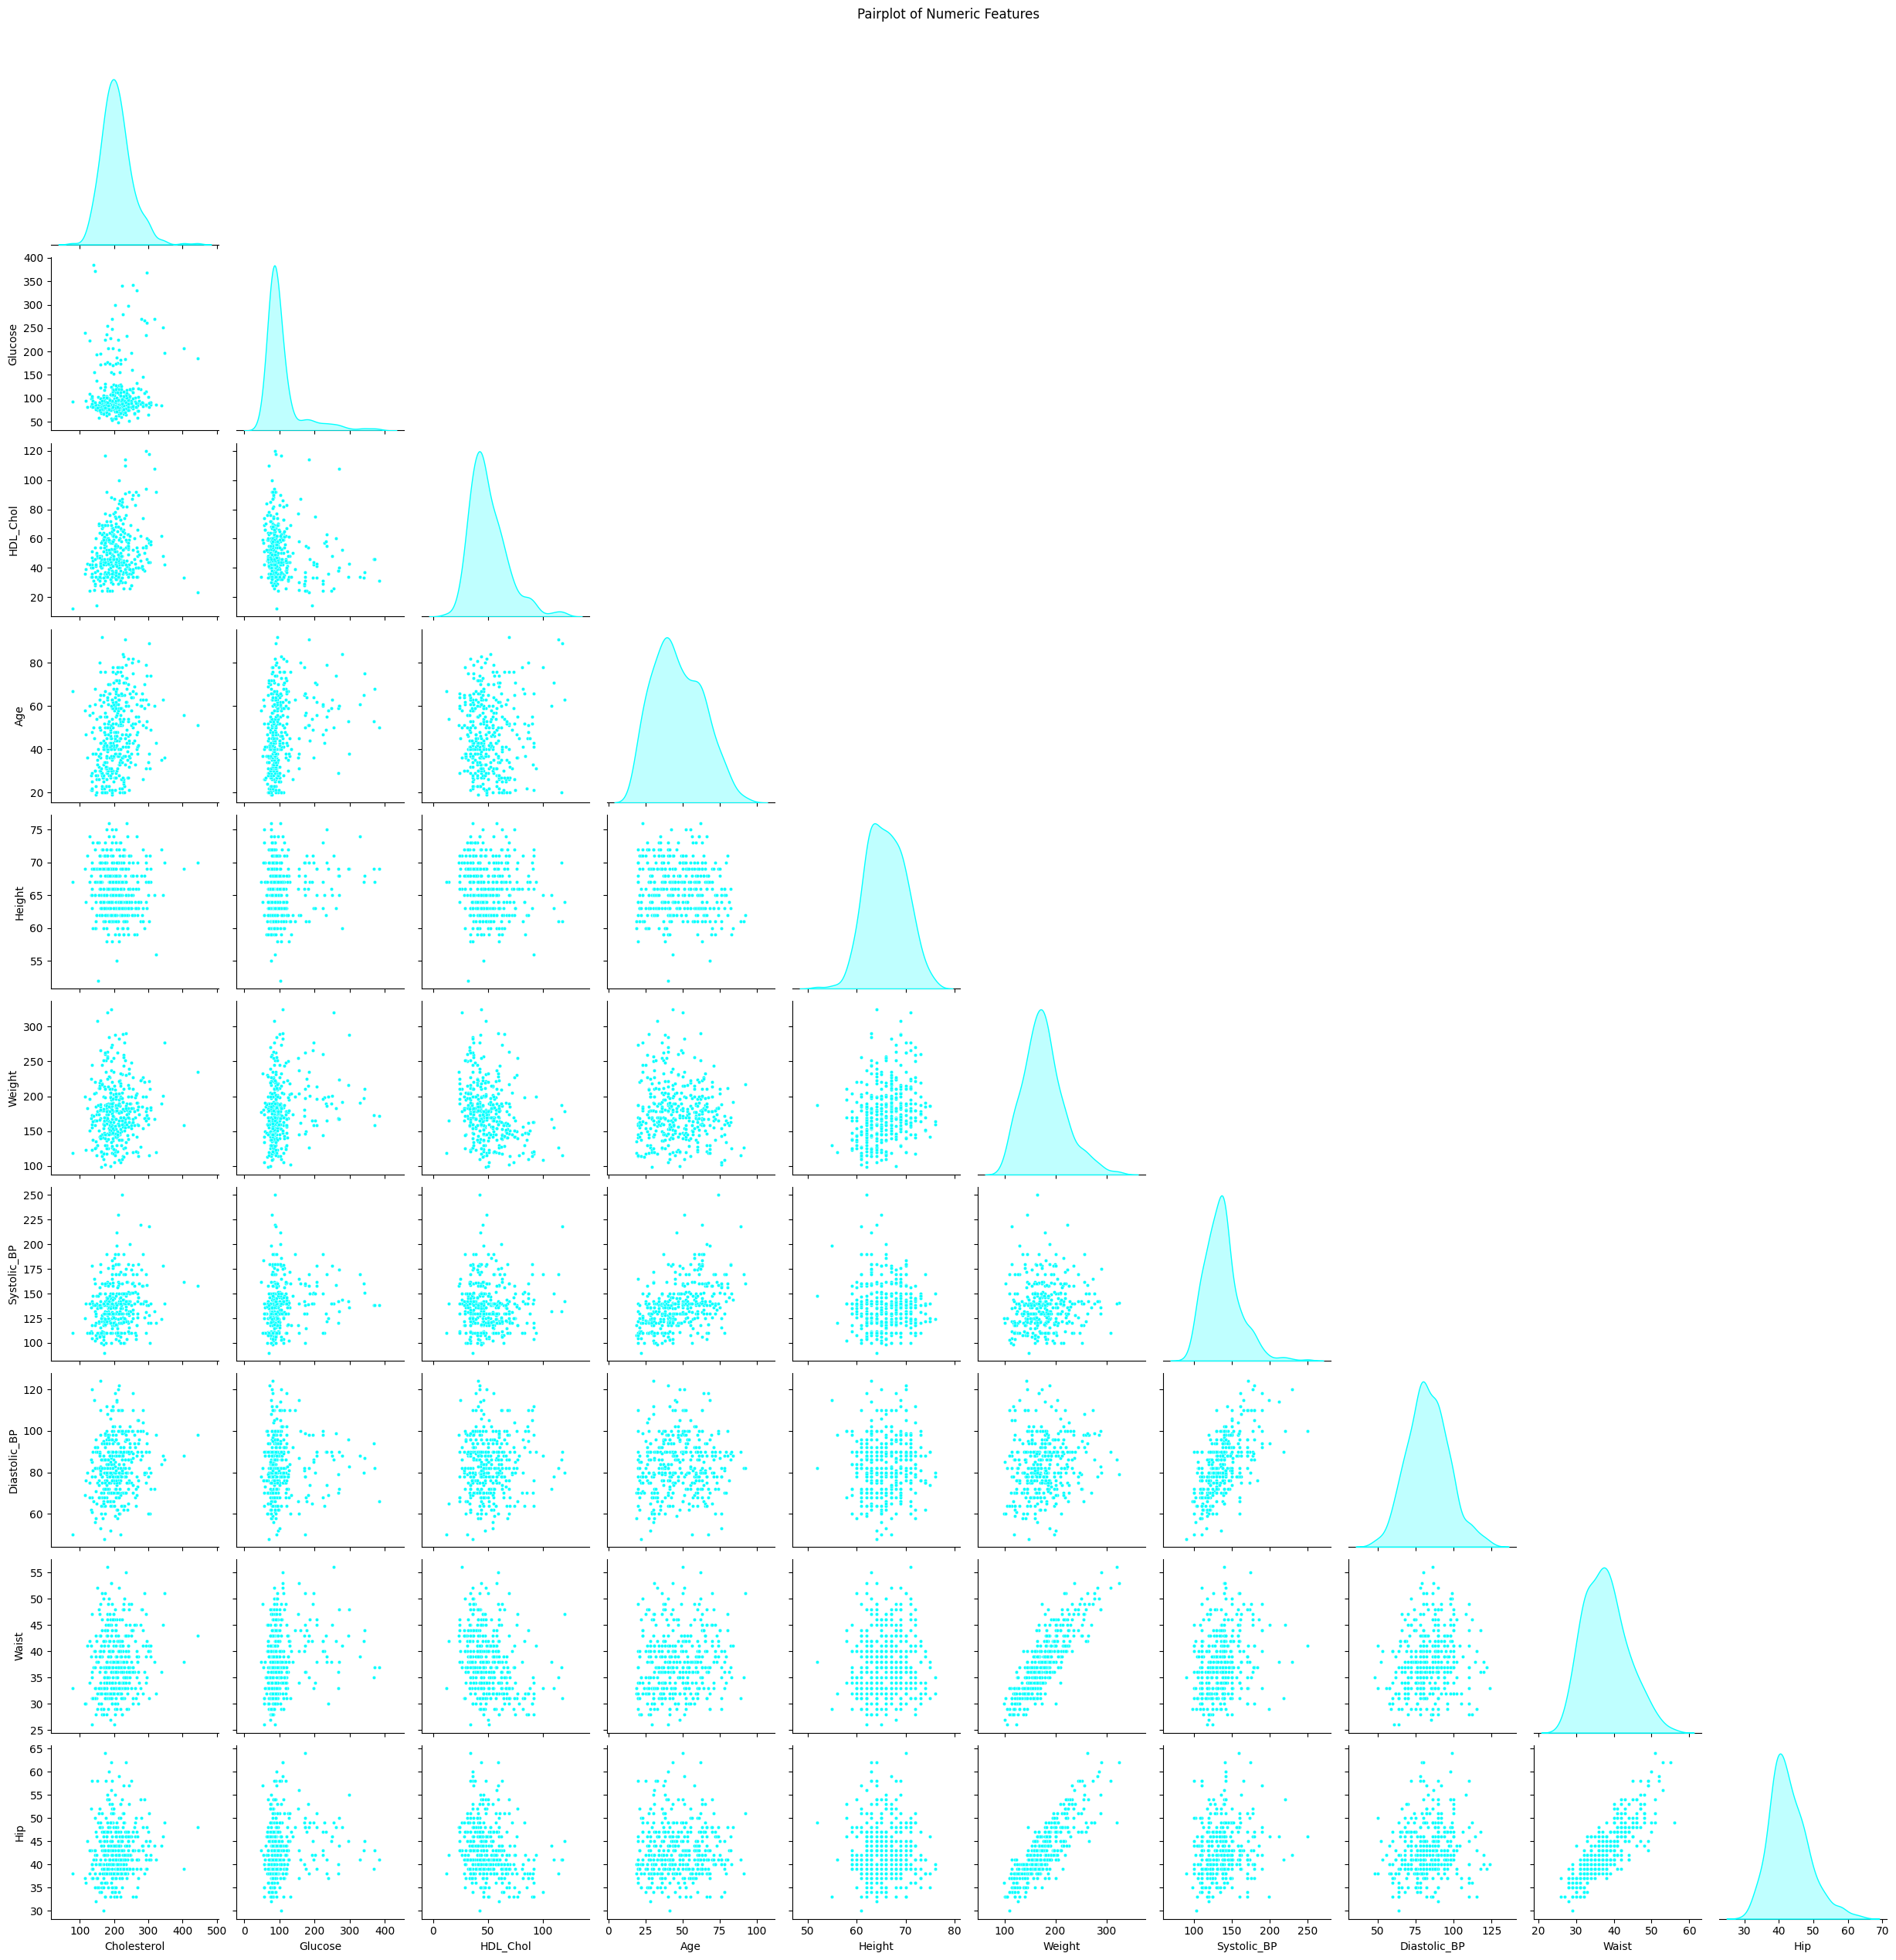

In [16]:
# Pairplot of the Numeric Features
sns.pairplot(df[numerical_columns],diag_kind='kde',plot_kws={'color': 'cyan', 's': 10},diag_kws={'color': 'cyan'},corner=True)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

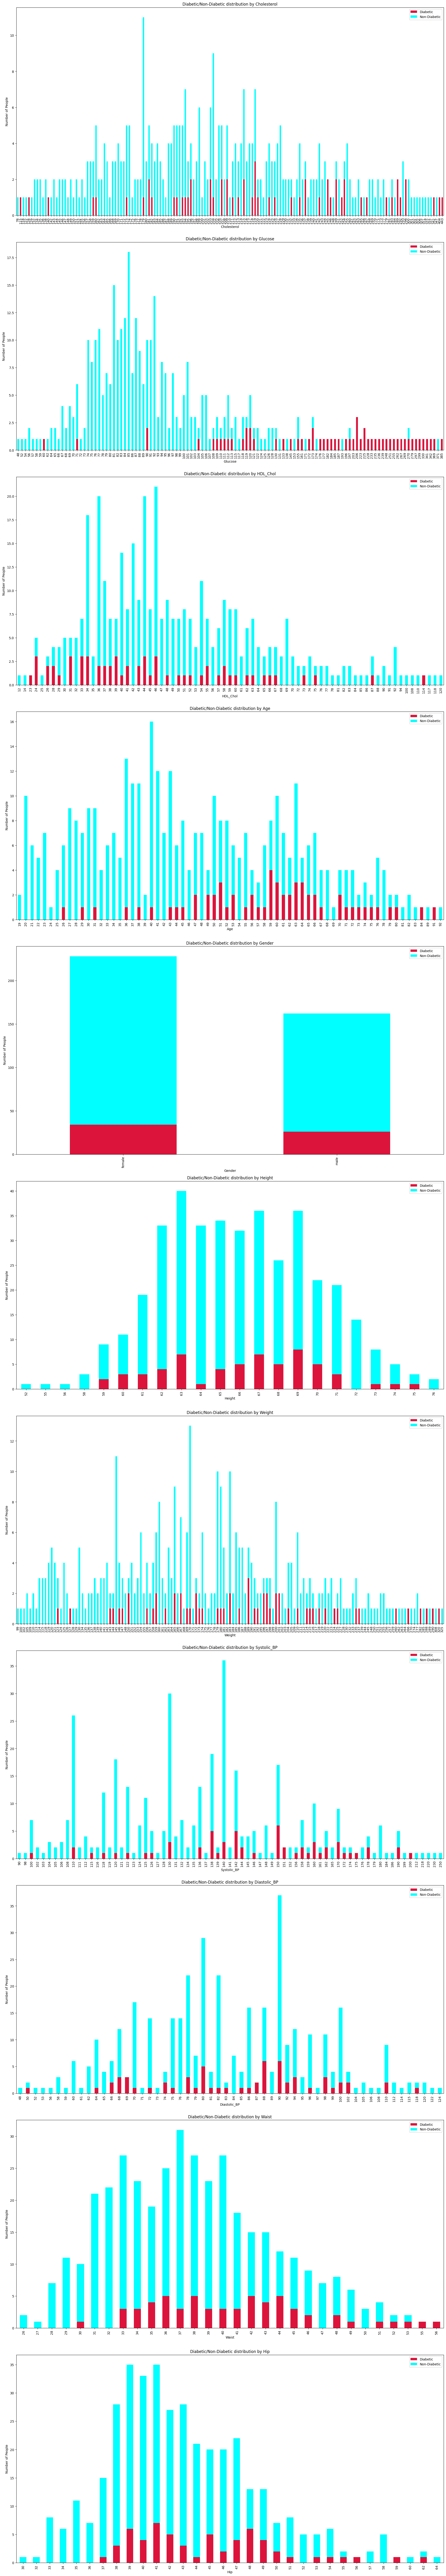

In [17]:
# Exclude columns that are not necessary or visually necessary for plotting
columns_to_plot = [col for col in df.columns if col not in ['Patient_number','Diabetes']]

# Calculate number of rows and columns for subplot grid
num_cols = 1  # Number of columns in subplot layout
num_rows = (len(columns_to_plot) + 1) // num_cols  # Calculate number of rows needed

# Adjust figure size based on number of subplots
fig_width = 19.2
fig_height = num_rows * 10  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# Iterate through each column and plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    diabetic_cross = pd.crosstab(index=df[col], columns=df['Diabetes'])
    diabetic_cross.plot(kind='bar', stacked=True, color=['crimson','cyan'], ax=plt.gca(), legend=None)
    plt.title(f'Diabetic/Non-Diabetic distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of People')
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(['Diabetic', 'Non-Diabetic'], loc='upper right')
    plt.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Adding Chol/HDL ratio and Waist/Hip ratio


In [18]:
df.insert(4, 'Ratio_Chol_HDL', (df['Cholesterol'] / df['HDL_Chol']).round(1))

df.insert(9, 'BMI', (df['Weight'] / (df['Height'] * df['Height']) * 703).round(1))

df.insert(14, 'Ratio_Waist_Hip', (df['Waist'] / df['Hip']).round(2))

df.drop(columns=['Patient_number'],axis = 1,inplace=True)

In [19]:
# Iterate through each column
for column in df.columns:
    #Get unique values in the column
    unique_values = df[column].unique()

    #Print the column name and its unique values
    print(f"Unique values in \033[91m\033[1m{column}\033[0m column:\033[96m")

    # List to store formatted values
    formatted_values = []
    
    # Format and accumulate each unique value to two decimal places if it's a float
    for value in unique_values:
        if isinstance(value, (float, int)):  # Check if the value is numeric
            formatted_values.append(f"{value:.2f}")  # Format numeric values to two decimal places
        else:
            formatted_values.append(str(value))  # Convert non-numeric values to string and add to list
    
    # Print all formatted values in a single line
    print("\033[96m, ".join(formatted_values))
    print('\033[0m')

Unique values in Cholesterol column:
193, 146, 217, 226, 164, 170, 149, 230, 179, 174, 132, 203, 135, 187, 244, 165, 172, 223, 136, 175, 147, 229, 185, 228, 199, 134, 169, 227, 155, 283, 220, 201, 238, 190, 204, 166, 241, 214, 151, 184, 168, 189, 163, 181, 194, 158, 160, 144, 182, 145, 195, 207, 192, 183, 176, 188, 209, 293, 305, 191, 213, 231, 262, 300, 248, 224, 171, 150, 337, 239, 218, 122, 225, 197, 186, 178, 347, 245, 215, 243, 156, 232, 212, 206, 302, 138, 159, 268, 251, 216, 200, 211, 152, 173, 219, 180, 267, 234, 269, 270, 177, 208, 162, 322, 254, 237, 202, 260, 233, 142, 242, 118, 266, 307, 255, 196, 140, 284, 222, 249, 443, 261, 273, 296, 240, 148, 271, 157, 263, 129, 404, 115, 221, 289, 198, 235, 277, 318, 279, 128, 143, 265, 236, 342, 281, 246, 78, 205, 306, 210, 292, 252, 301

Unique values in Glucose column:
77, 79, 75, 97, 91, 69, 71, 112, 105, 106, 99, 84, 88, 89, 76, 70, 81, 86, 78, 66, 87, 101, 104, 98, 138, 58, 90, 83, 60, 100, 92, 94, 62, 111, 74, 96, 269, 82, 124, 

# Saving the new data to a new file

In [20]:
df.to_csv('Data_sets/filtered_data.csv', index=False)

In [21]:
data = pd.read_csv('Data_sets/filtered_data.csv')

In [22]:
# display the first ten rows and all columns
data.head(10)

,Cholesterol,Glucose,HDL_Chol,Ratio_Chol_HDL,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,Waist,Hip,Ratio_Waist_Hip,Diabetes
0,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.82,No diabetes
2,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes
5,170,69,64,2.7,20,female,64,161,27.6,108,70,37,40,0.92,No diabetes
6,149,77,49,3.0,20,female,62,115,21.0,105,82,31,37,0.84,No diabetes
7,164,71,63,2.6,20,male,72,145,19.7,108,78,29,36,0.81,No diabetes
8,230,112,64,3.6,20,male,67,159,24.9,100,90,31,39,0.79,No diabetes
9,179,105,60,3.0,20,female,58,170,35.5,140,100,34,46,0.74,No diabetes


In [23]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns

In [24]:
category_cols #Show the categorical titles for next code to encode and get dummies

Index(['Gender', 'Diabetes'], dtype='object')

In [25]:
# Drop numerical columns from data
data_categorical = data.drop(columns=numerical_cols)

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data_categorical, columns=['Gender'])

encoded_data.head()

,Diabetes,Gender_female,Gender_male
0,No diabetes,True,False
1,No diabetes,True,False
2,No diabetes,True,False
3,No diabetes,True,False
4,No diabetes,True,False


## Changing Numeric Value to Standard Scale

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

scaler = StandardScaler()
scaler.fit(data[numerical_cols])

# Create a pipeline with the fitted scaler
numerical_pipeline = Pipeline([('scaler', scaler)])

# Transform numerical columns
numerical_data = numerical_pipeline.transform(data[numerical_cols])

# Convert transformed numerical data back to DataFrame
numerical_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

# Combine numerical and categorical data
# Assuming encoded_data is your DataFrame with encoded categorical data
final_data = pd.concat([encoded_data, numerical_data_df], axis=1)
final_data.head()

,Diabetes,Gender_female,Gender_male,Cholesterol,Glucose,HDL_Chol,Ratio_Chol_HDL,Age,Height,Weight,BMI,Systolic_BP,Diastolic_BP,Waist,Hip,Ratio_Waist_Hip
0,No diabetes,True,False,-0.319013,-0.564655,-0.073401,-0.361651,-1.692029,-1.265070,-1.447312,-0.951944,-0.838071,-0.985822,-1.020105,-0.882489,-0.561317
1,No diabetes,True,False,-1.372619,-0.527432,-0.536983,-0.534499,-1.692029,-1.520574,-1.050840,-0.360358,-1.276087,-1.875972,-0.846299,-0.528950,-0.834617
2,No diabetes,True,False,0.218998,-0.601879,0.216339,-0.304035,-1.631108,0.267951,0.237692,0.079539,-1.188484,-0.837464,0.370339,0.354899,0.121934
3,No diabetes,True,False,0.420753,-0.192418,1.143504,-0.764963,-1.631108,-0.498560,-1.571209,-1.391841,-0.662865,-1.430897,-1.193910,-0.705719,-1.244567
4,No diabetes,True,False,-0.969111,-0.304089,0.969660,-1.225890,-1.631108,1.034462,-0.902163,-1.300828,-0.662865,0.201045,-1.020105,-0.705719,-0.834617


## Saving the scaler for later input

In [27]:
import os
# Create the directory if it does not exist
scaler_dir = 'SCALER_DATA'
os.makedirs(scaler_dir, exist_ok=True)

# Save the scaler to a file in the directory
scaler_path = os.path.join(scaler_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)

print(f'Scaler saved to {scaler_path}')

Scaler saved to SCALER_DATA\scaler.pkl


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # For saving the model

# Extract features (X) and target variable (y)
X = final_data.drop('Diabetes', axis=1)
y = final_data['Diabetes']

# Convert target variable to numerical (0 and 1)
y = y.map({'No diabetes': 0, 'Diabetes': 1})

# Split data into training data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Naive Bayes Model

Training Accuracy: 0.92
Testing Accuracy: 0.90
Confusion Matrix:
[[55  7]
 [ 1 15]]


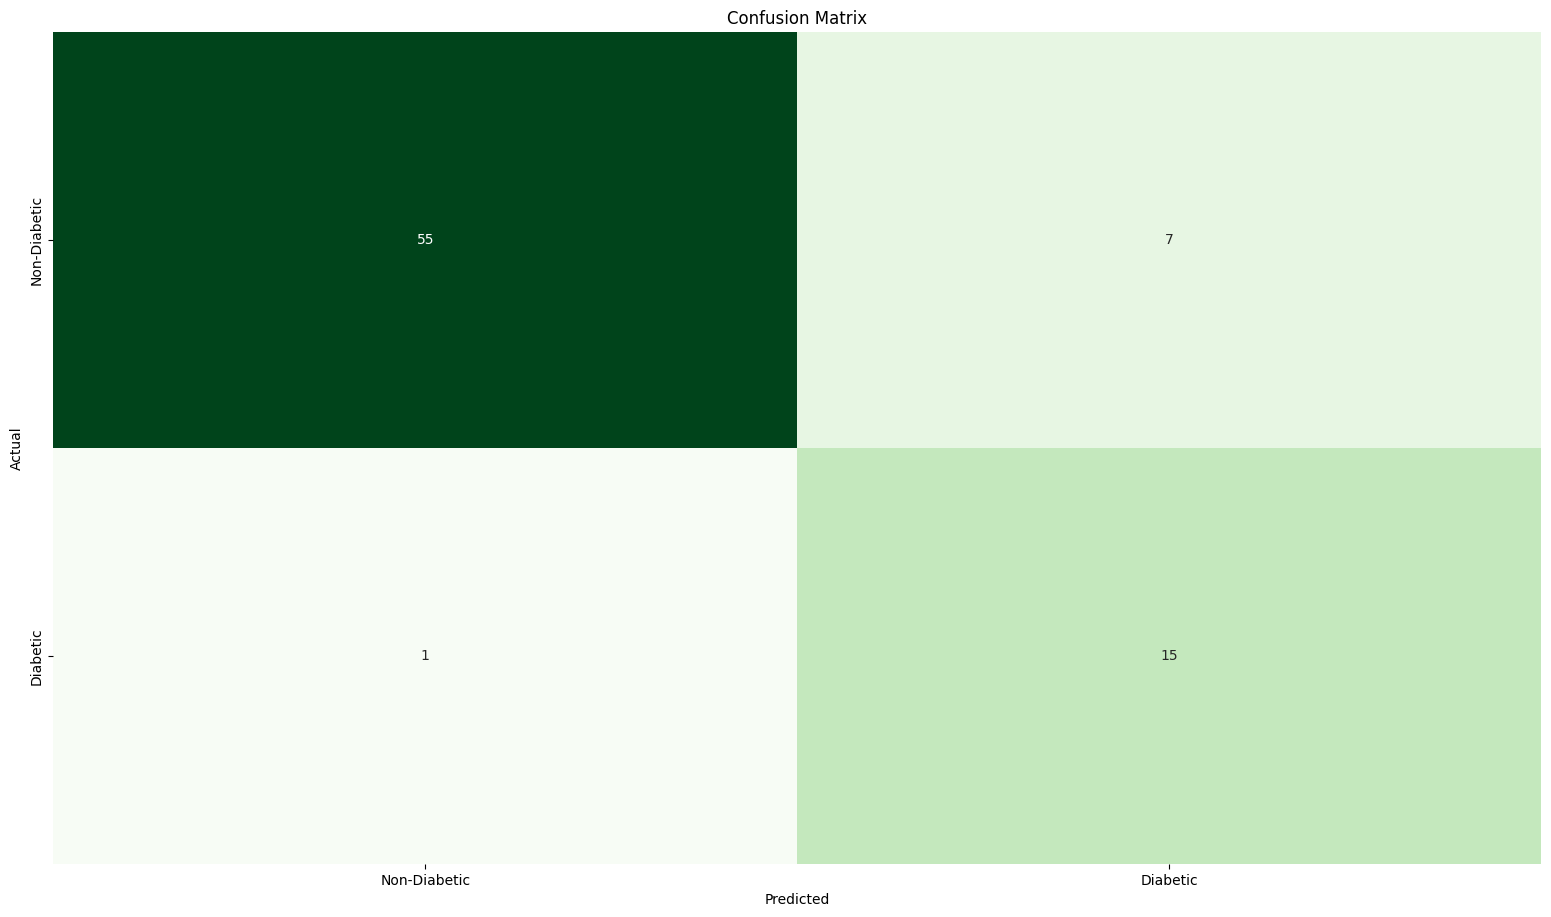

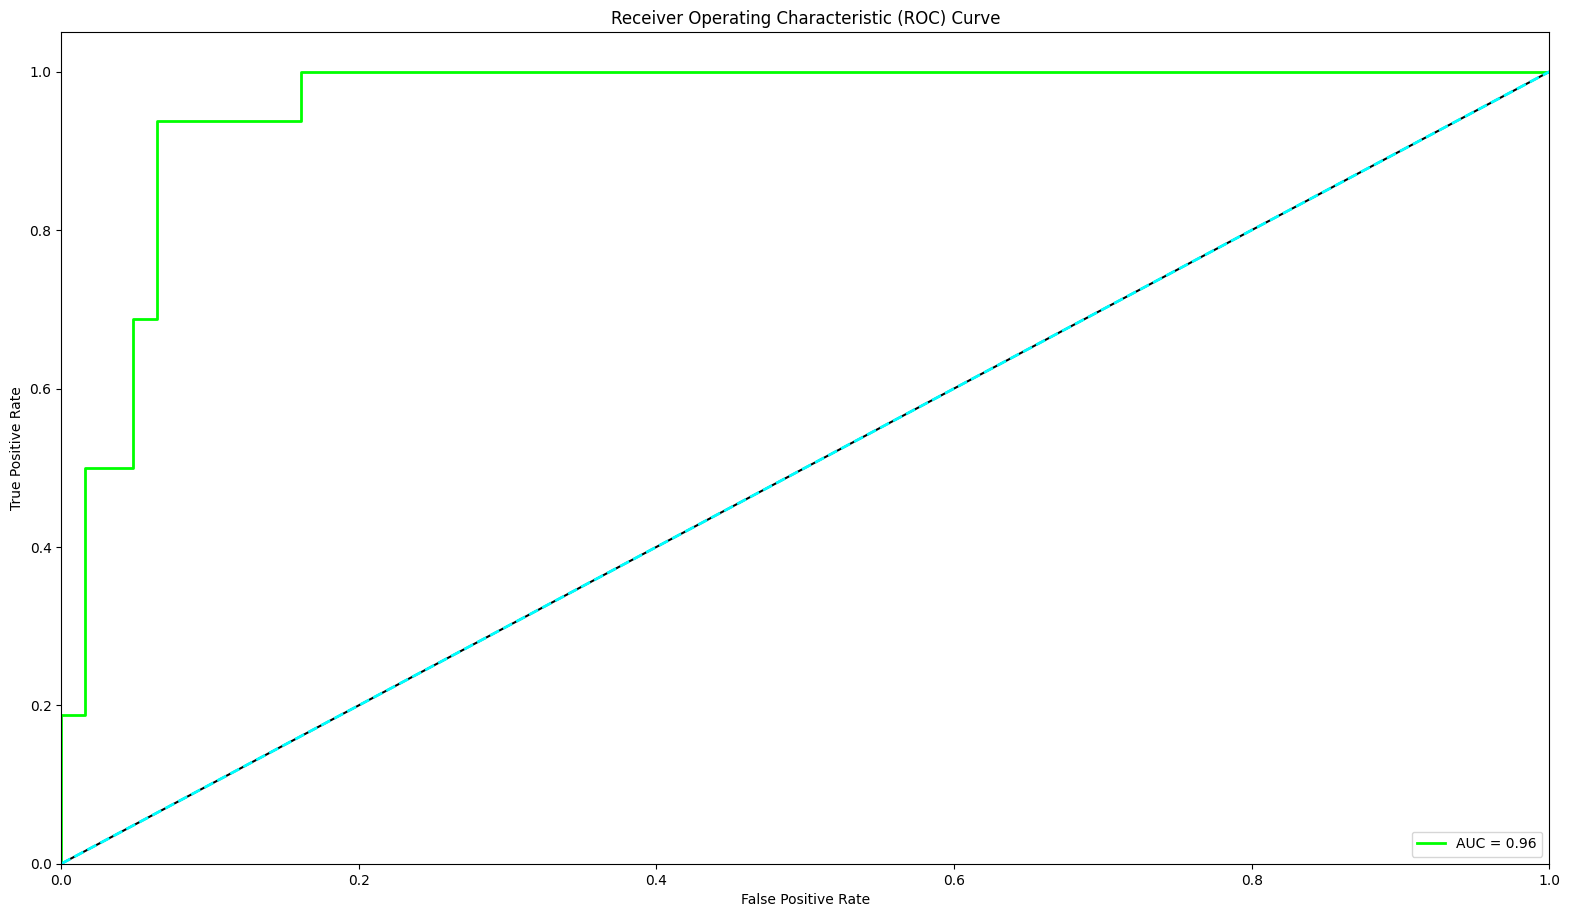

Model saved at ML_MODEL/naive_bayes_model.pkl


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/naive_bayes_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Logistic Regression Model

Training Accuracy: 0.93
Testing Accuracy: 0.91
Confusion Matrix:
[[58  4]
 [ 3 13]]


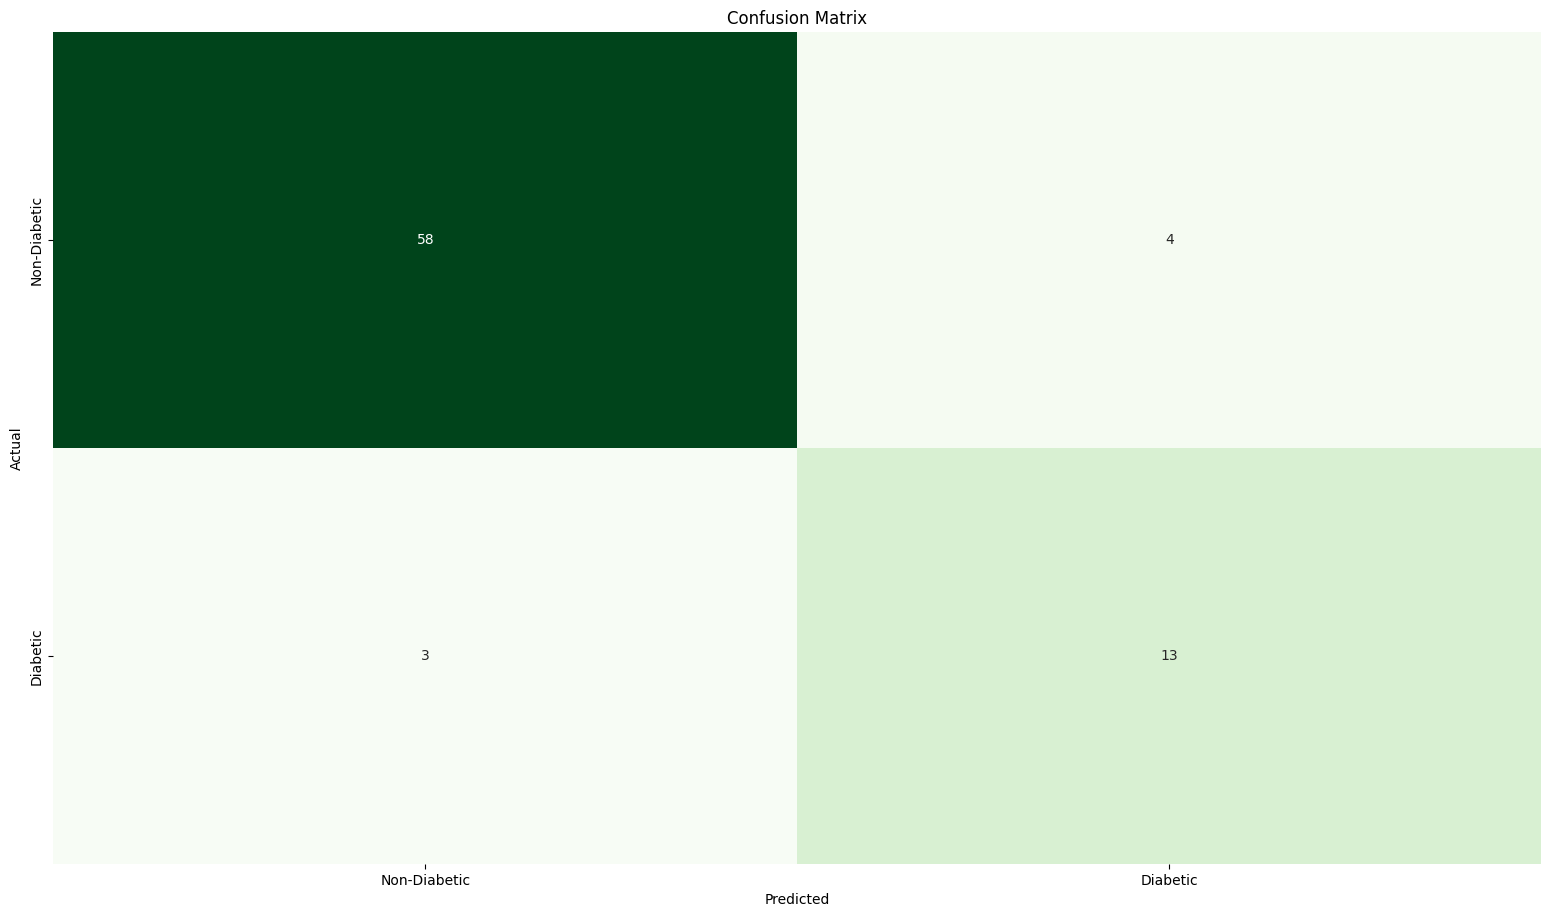

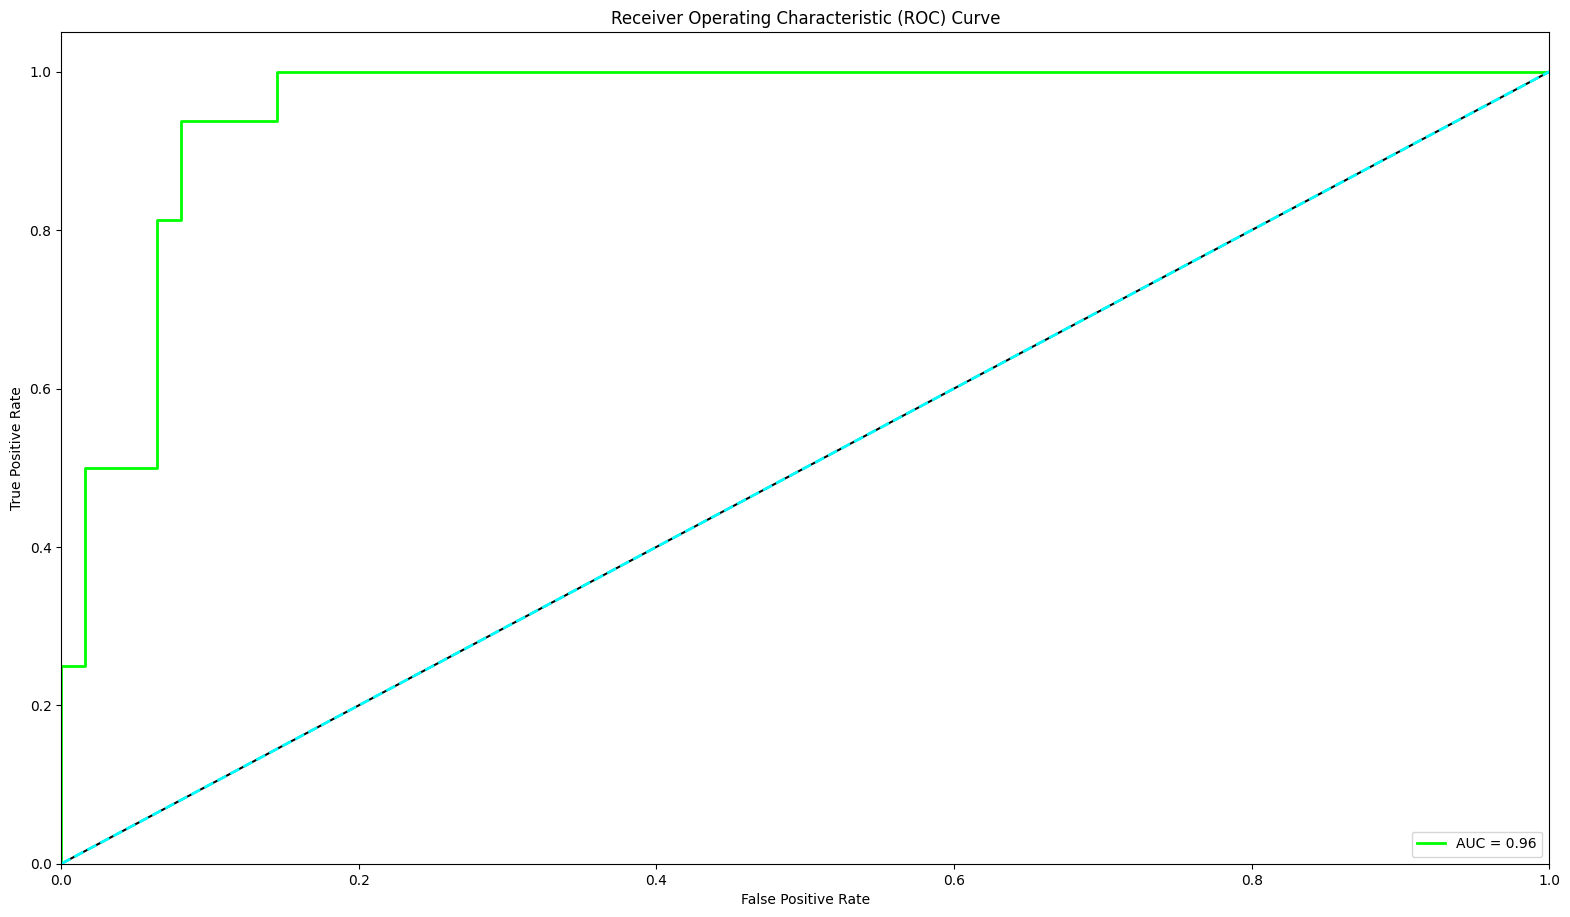

Model saved at ML_MODEL/logistic_regression_model.pkl


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X and y are already defined as features and target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model within a pipeline to include scaling
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/logistic_regression_model.pkl'
joblib.dump(pipeline, model_path)
print(f'Model saved at {model_path}')


# Gaussian NB Model

Training Accuracy: 0.92
Testing Accuracy: 0.90
Confusion Matrix:
[[55  7]
 [ 1 15]]


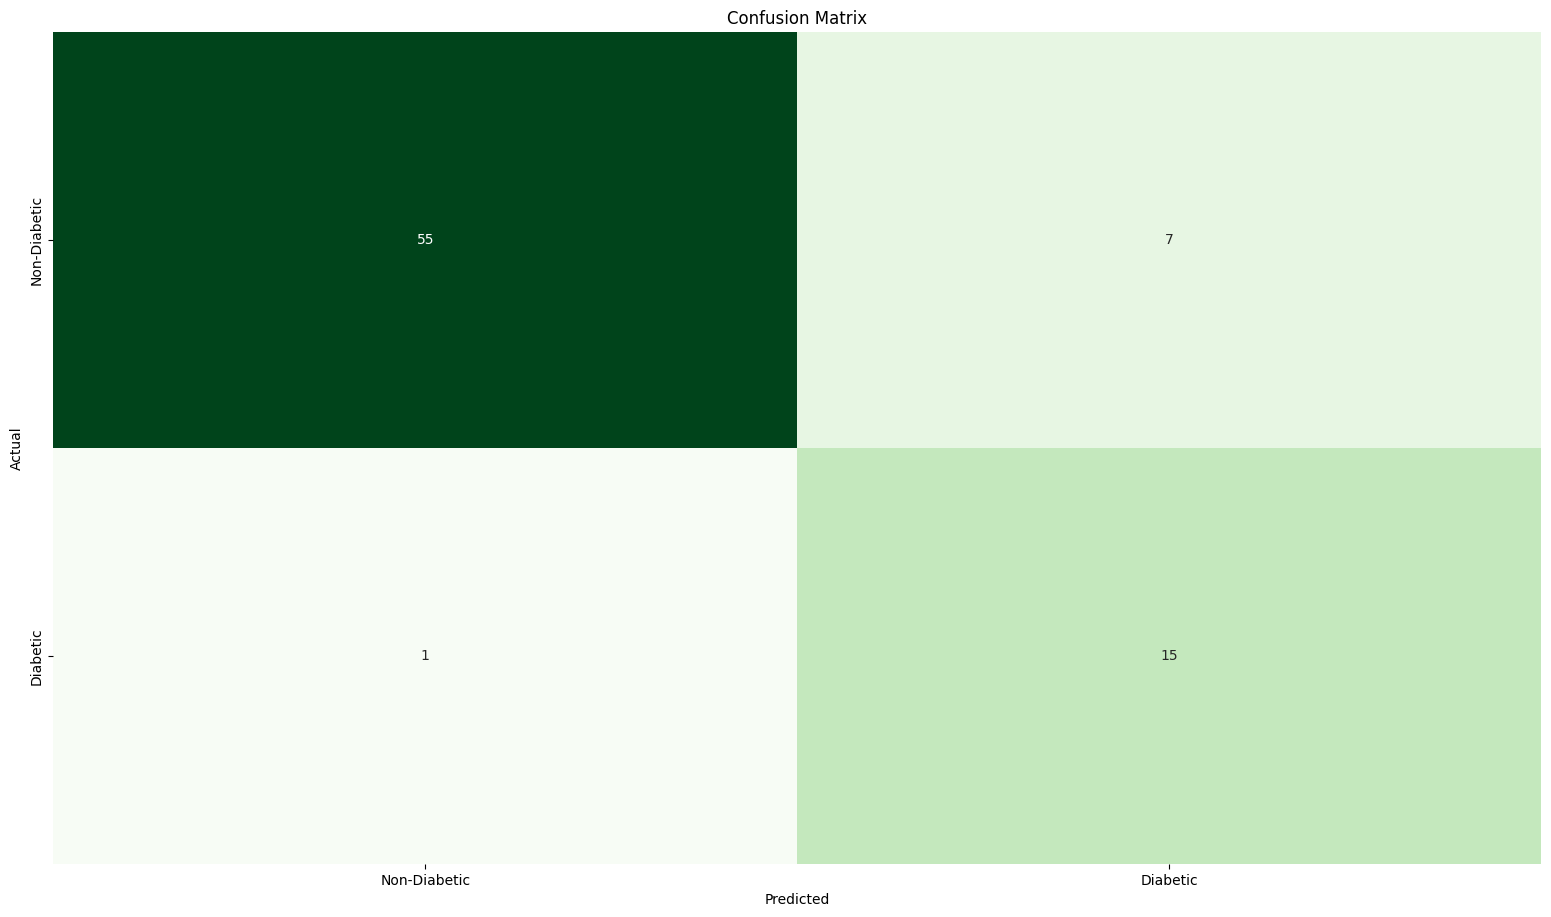

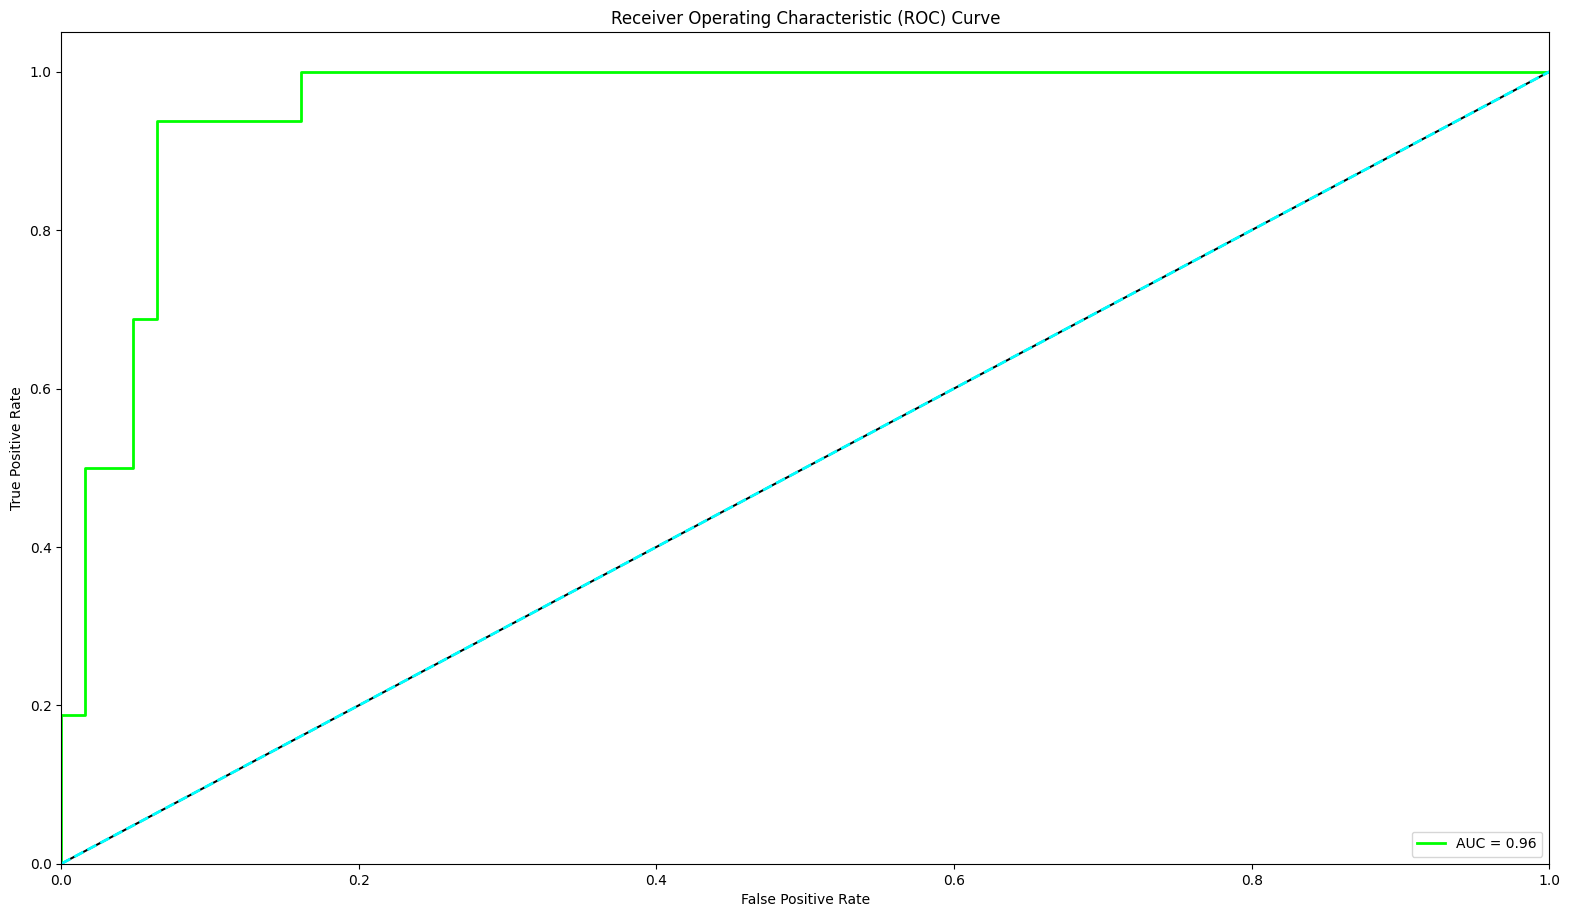

Model saved at ML_MODEL/naive_bayes_model.pkl


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/naive_bayes_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# K-Nearest Neighbour Algorithm:

Training Accuracy: 0.93
Testing Accuracy: 0.85
Confusion Matrix:
[[60  2]
 [10  6]]


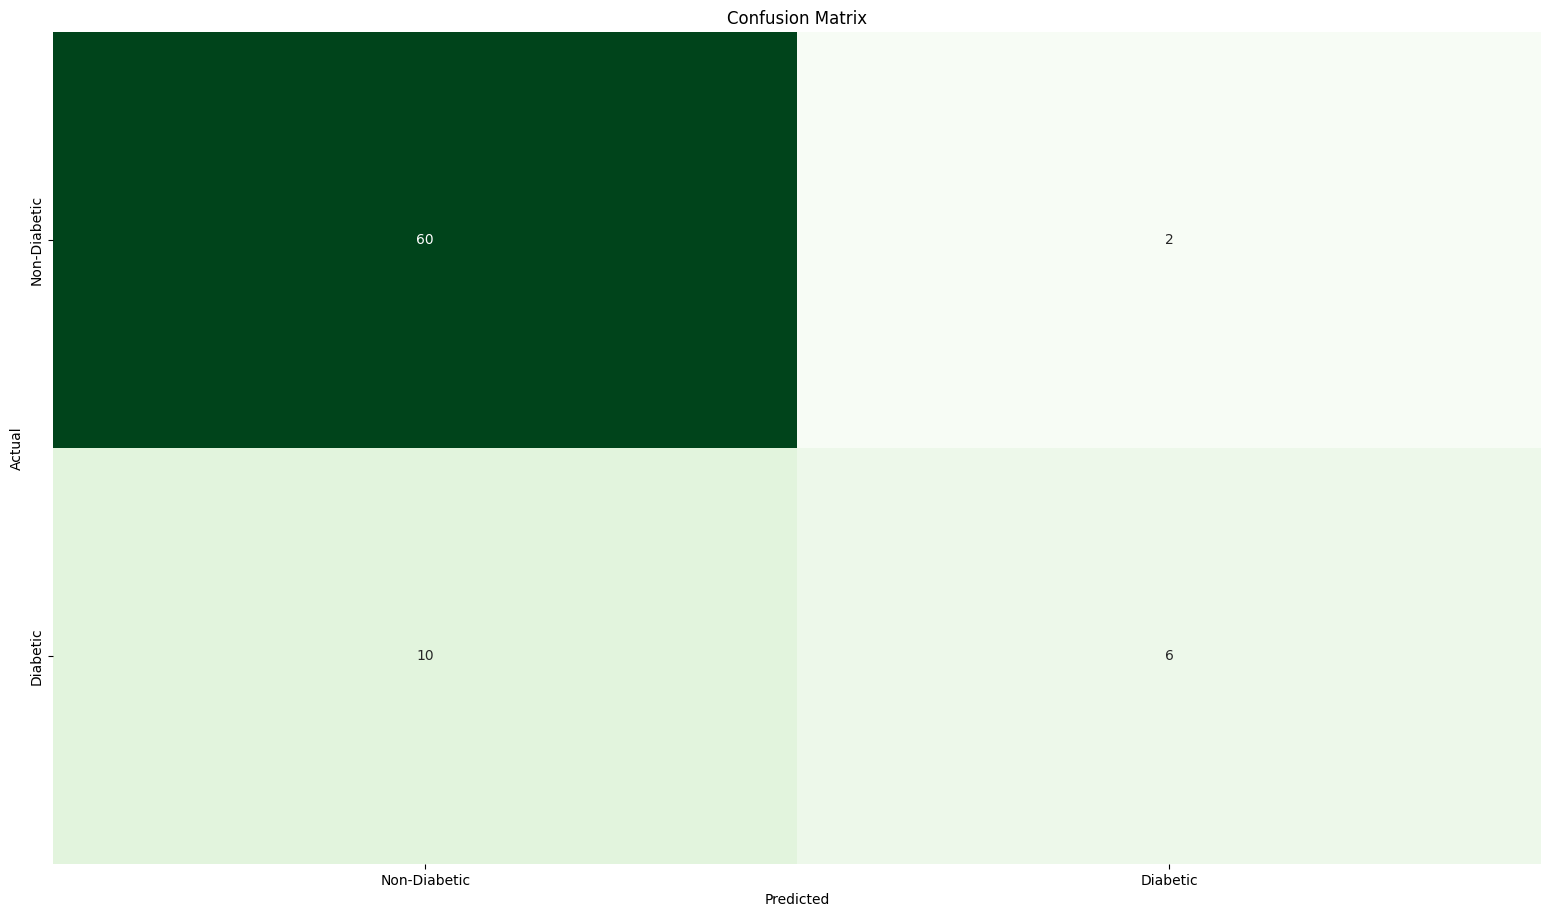

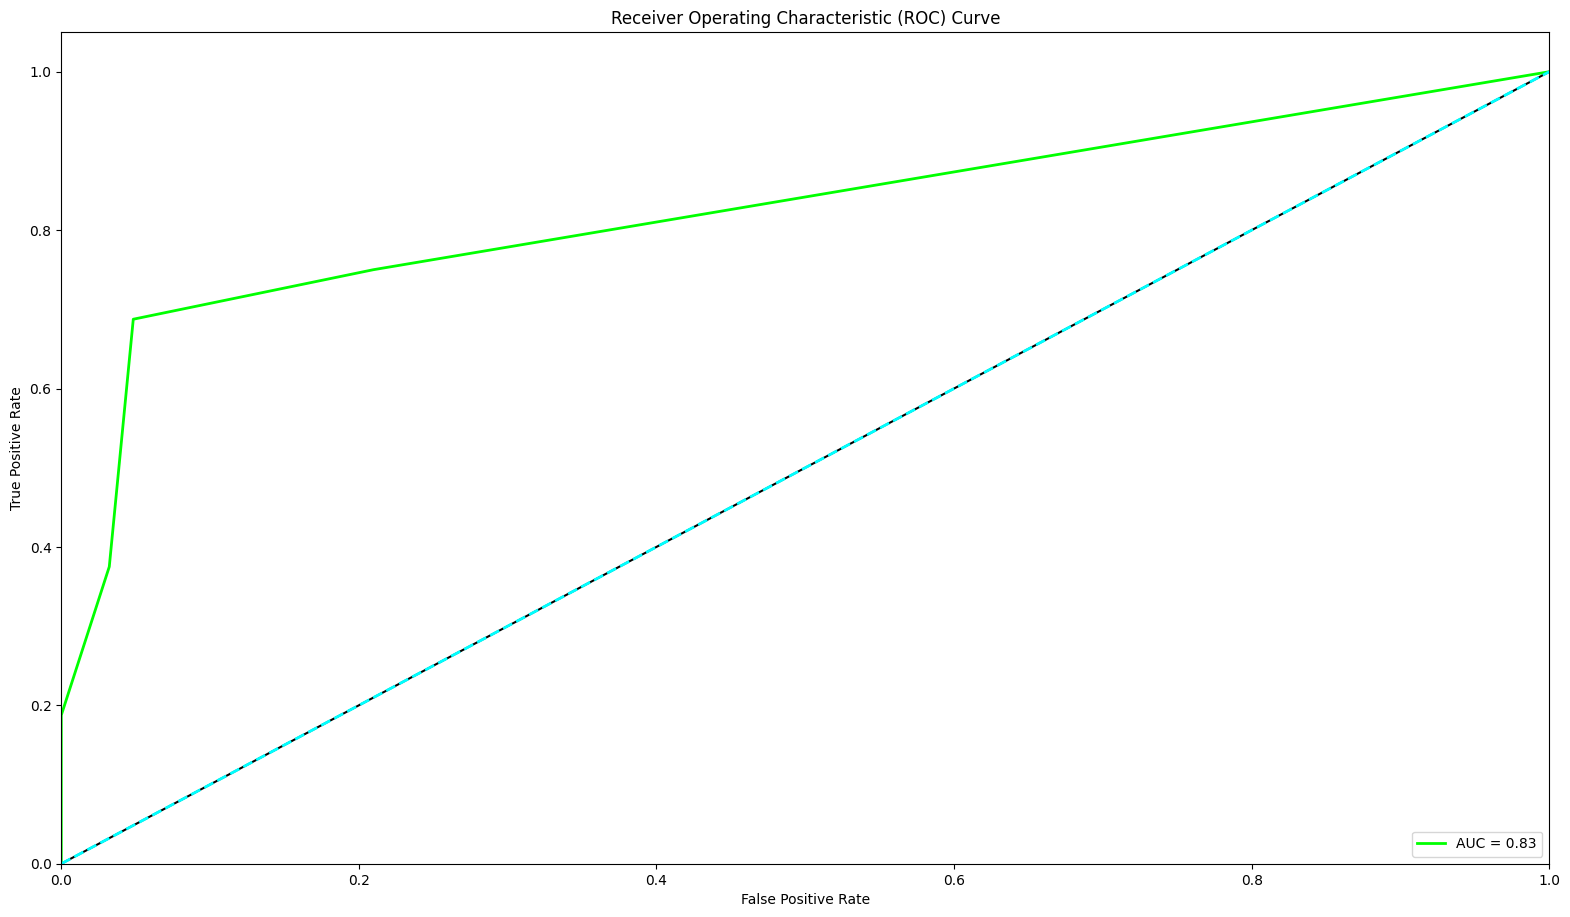

Model saved at ML_MODEL/knn_model.pkl


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')



# Random Forest Model

Training Accuracy: 1.00
Testing Accuracy: 0.90
Confusion Matrix:
[[58  4]
 [ 4 12]]


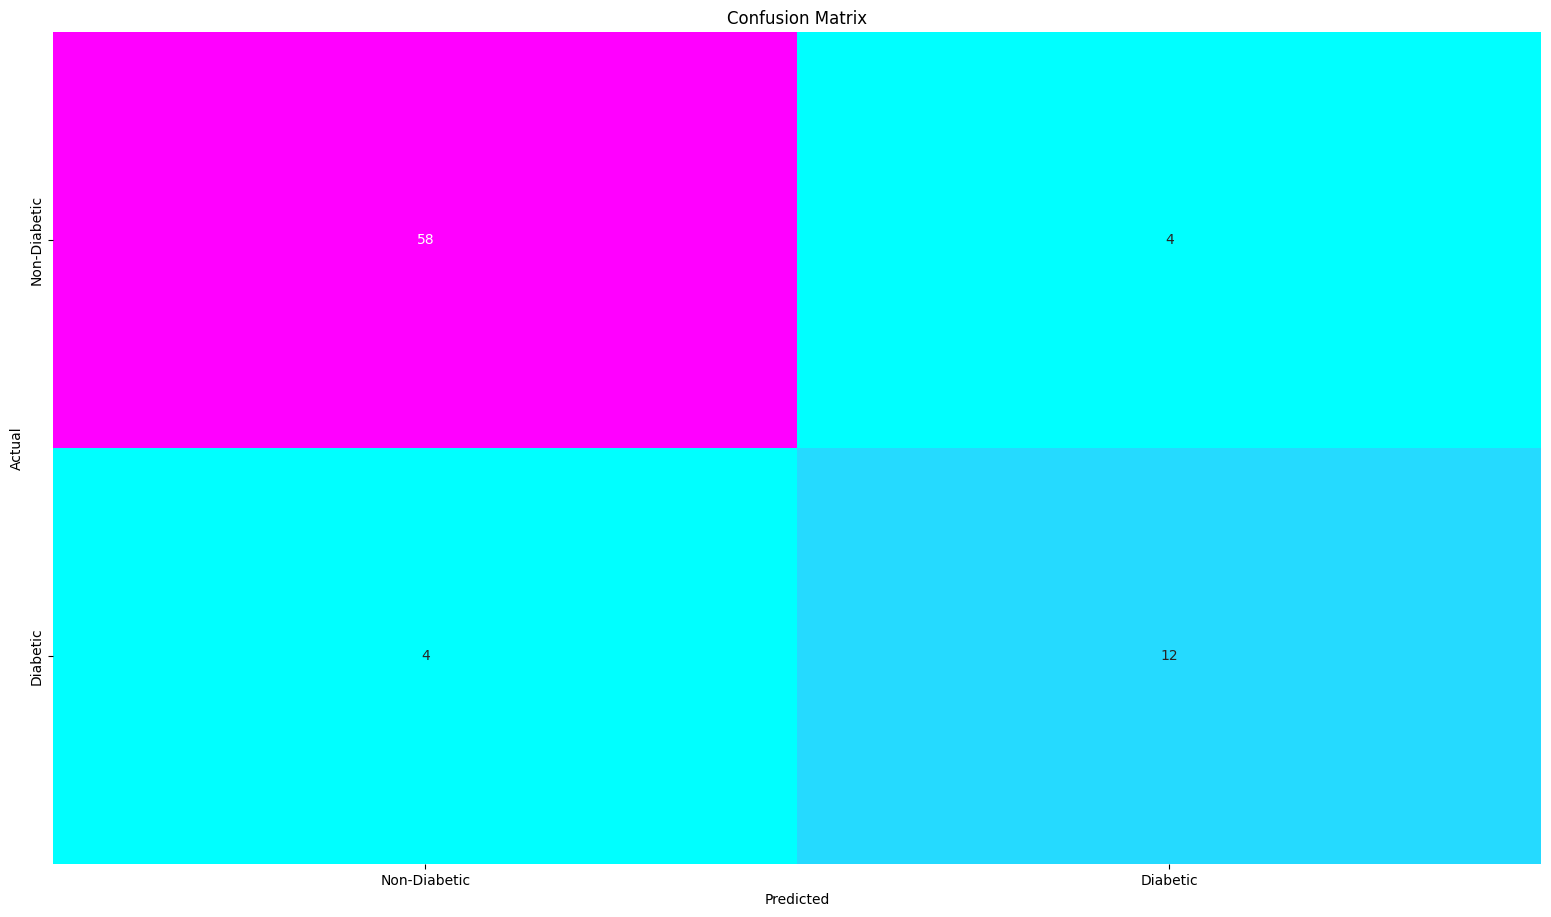

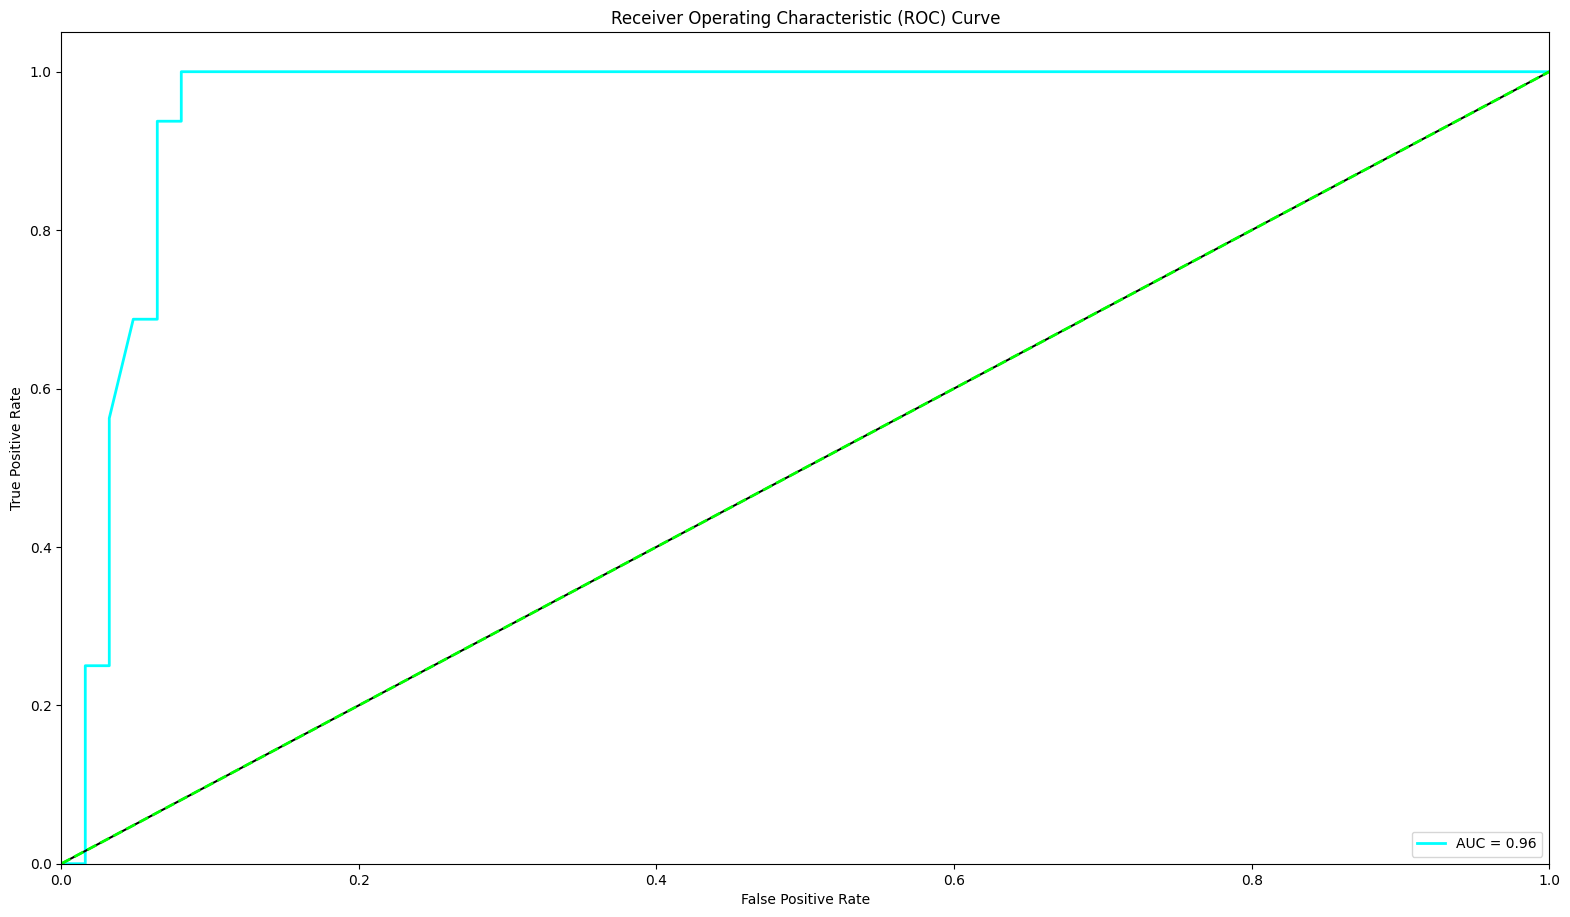

Model saved at ML_MODEL/random_forest_model.pkl


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='cyan', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

## Since Random Forest Model has presented the Highest Accuracy with Smoother Curve (and we also have outliers that I decided not to remove :p), so we use this for our Model.